## Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv("rolling_stones_spotify.csv")
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


## Data Inspection & Cleaning

In [3]:
# Struture & Size
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [4]:
# Remove Irrelevant Column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
# Missing Values & Duplicates
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [6]:
# Date Conversion
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

## Exploratory Data Analysis (EDA)

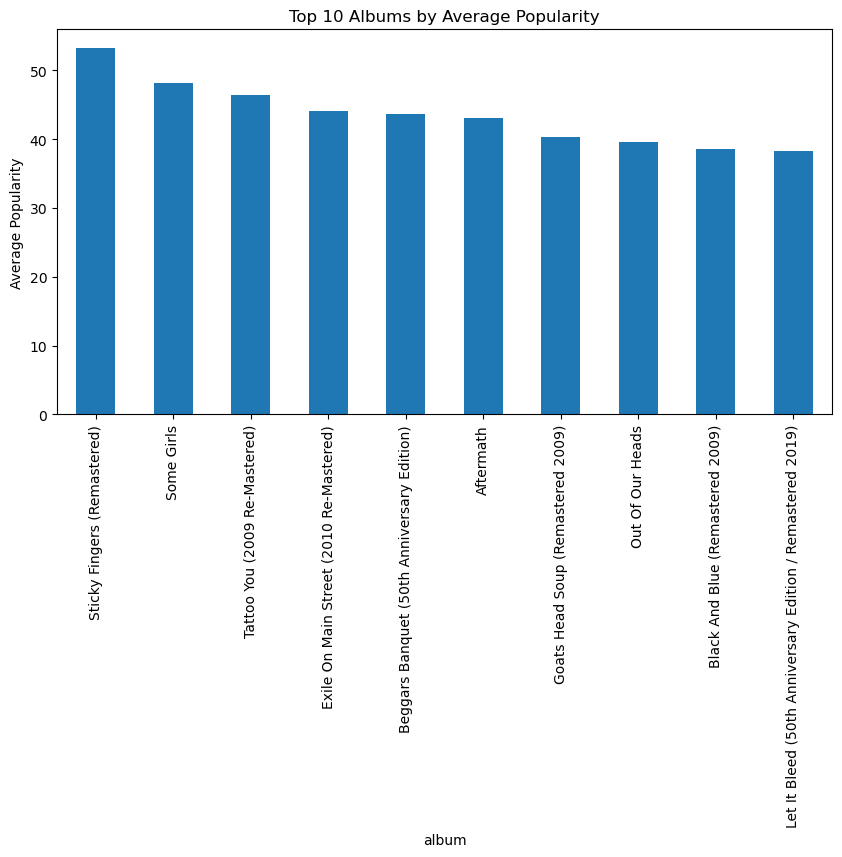

In [7]:
# Most Popular Albums (Recommendation Insight)
album_popularity = df.groupby('album')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
album_popularity.head(10).plot(kind='bar')
plt.title("Top 10 Albums by Average Popularity")
plt.ylabel("Average Popularity")
plt.show()

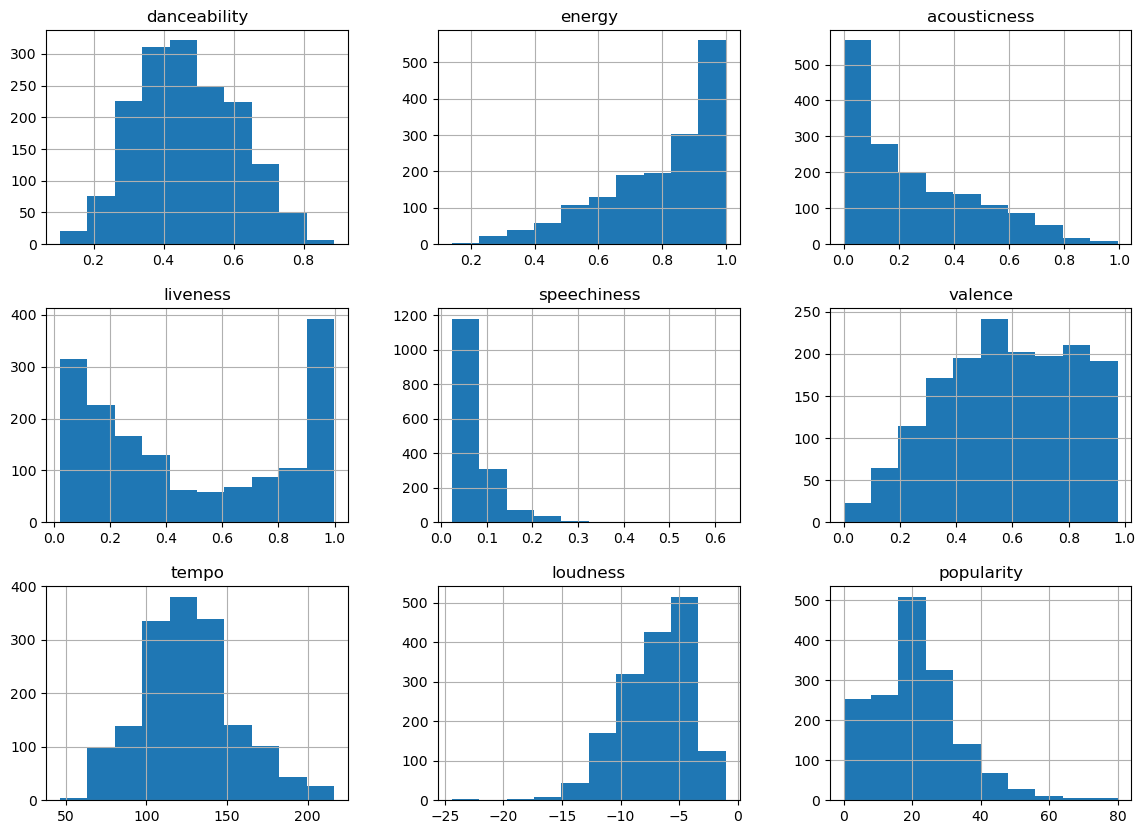

In [8]:
# Feature Distributions
features = ['danceability','energy','acousticness','liveness',
            'speechiness','valence','tempo','loudness','popularity']

df[features].hist(figsize=(14,10))
plt.show()

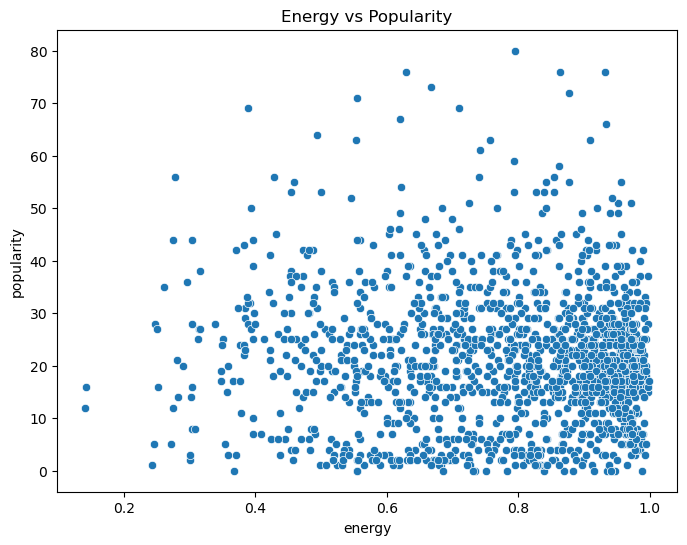

In [9]:
# Popularity vs Features
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='energy', y='popularity')
plt.title("Energy vs Popularity")
plt.show()

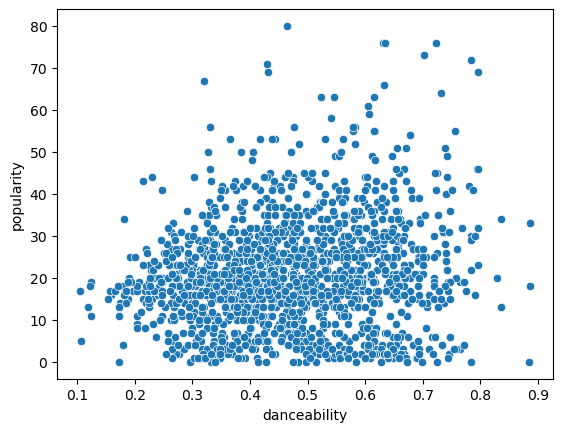

In [10]:
sns.scatterplot(data=df, x='danceability', y='popularity')
plt.show()

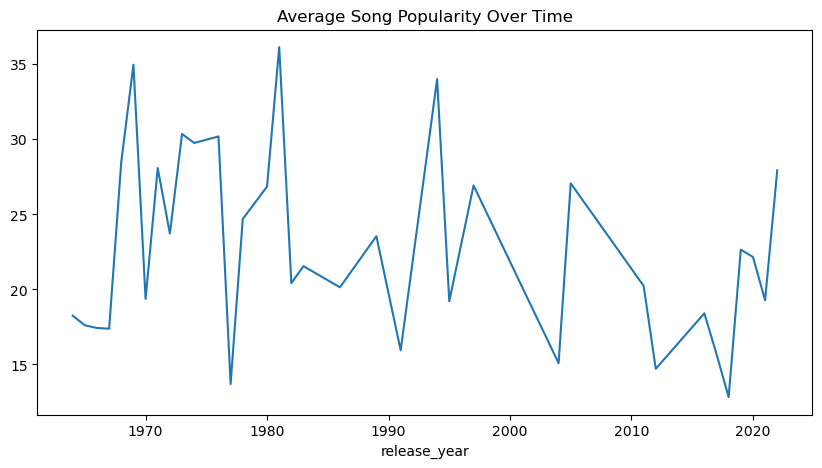

In [11]:
# Popularity Over Time
year_popularity = df.groupby('release_year')['popularity'].mean()

plt.figure(figsize=(10,5))
year_popularity.plot()
plt.title("Average Song Popularity Over Time")
plt.show()

## Feature Selection for Clustering

In [13]:
# We exclude identifiers and text fields.
cluster_features = [
    'acousticness','danceability','energy','instrumentalness',
    'liveness','loudness','speechiness','tempo','valence','duration_ms'
]

X = df[cluster_features]

## Feature Scaling

In [14]:
# Clustering requires scaled data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Dimensionality Reduction (PCA)

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [16]:
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [0.30326096 0.16514826]


## Identify Optimal Number of Clusters

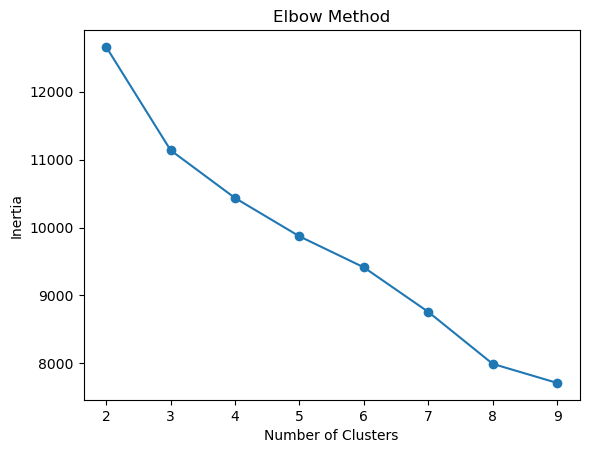

In [22]:
# Elbow Method
inertia = []

for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,10), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [23]:
# Silhouette Score
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    print(k, silhouette_score(X_scaled, labels))

2 0.20241396786177943
3 0.16883212951135135
4 0.13541457057489914
5 0.144901243984248
6 0.12963982402503538


## K-Means Clustering

In [24]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

## Cluster Visualization

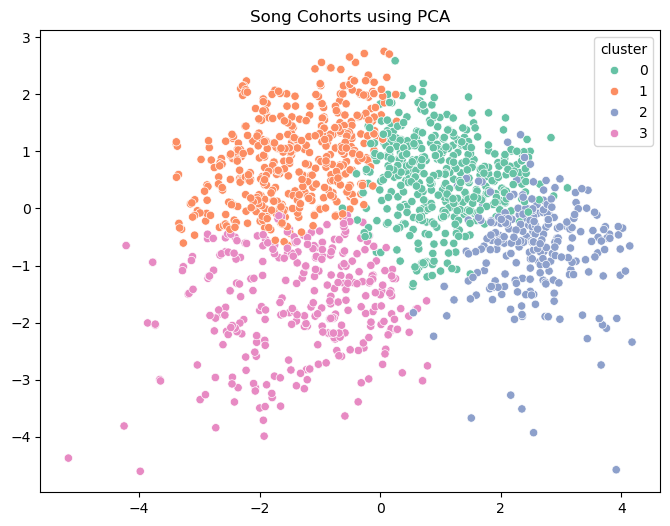

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='Set2')
plt.title("Song Cohorts using PCA")
plt.show()

## Cluster Interpretation (MOST IMPORTANT)

In [26]:
df.groupby('cluster')[cluster_features].mean()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms
cluster,,,,,,,,,,
0,0.152442,0.406414,0.901076,0.154457,0.705607,-5.483144,0.067977,134.027212,0.596701,251928.938144
1,0.213671,0.595289,0.767117,0.218140,0.221641,-7.601935,0.047236,121.991565,0.797724,215257.086207
2,0.222331,0.334611,0.944242,0.172073,0.876151,-5.245570,0.145030,136.456468,0.332118,356045.343396
3,0.470048,0.468462,0.556231,0.088560,0.300559,-9.487246,0.046911,112.864834,0.424447,254597.621302
